In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Retail and wherehouse Sale.csv")

In [8]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [10]:
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

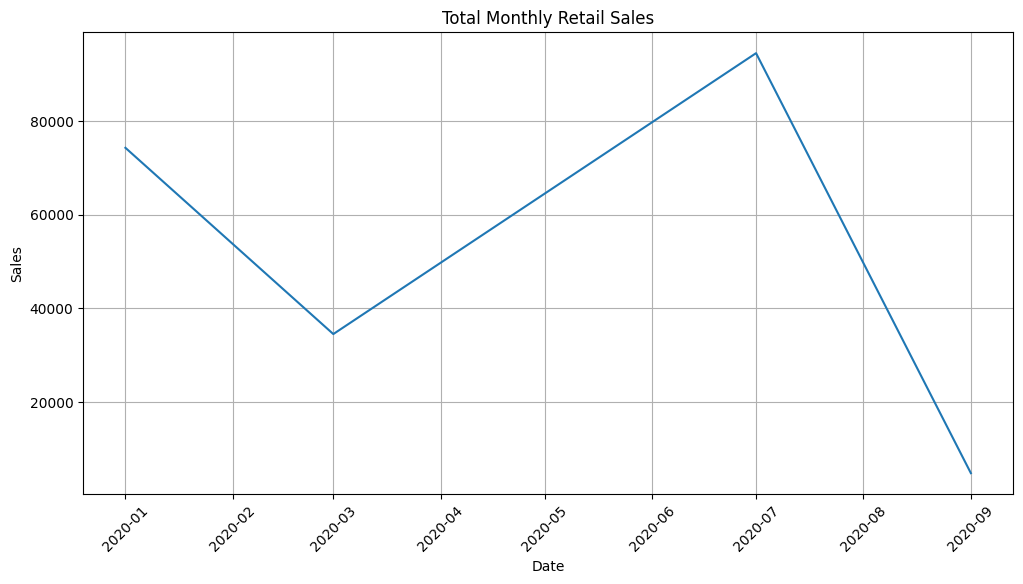

In [12]:
# Aggregate sales per month
monthly_sales = df.groupby('DATE')['RETAIL_SALES'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='DATE', y='RETAIL_SALES')
plt.title('Total Monthly Retail Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

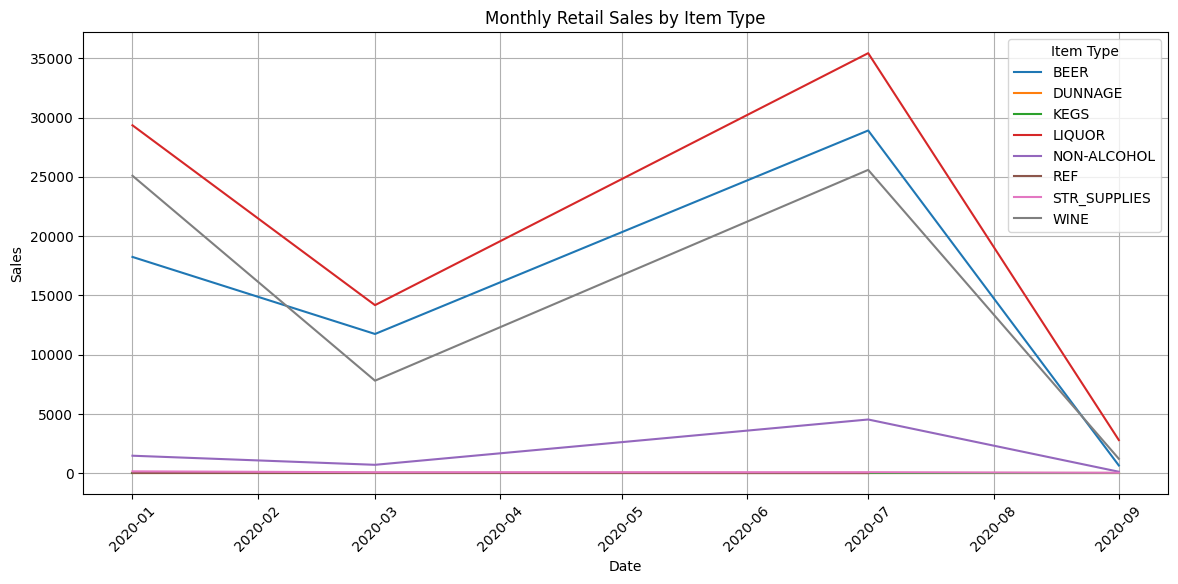

In [14]:
# Sales by item type
monthly_type_sales = df.groupby(['DATE', 'ITEM_TYPE'])['RETAIL_SALES'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_type_sales, x='DATE', y='RETAIL_SALES', hue='ITEM_TYPE')
plt.title('Monthly Retail Sales by Item Type')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.grid(True)
plt.show()

# Forecasting Model

In [16]:
from prophet import Prophet

# Filter for WINE
wine_df = df[df['ITEM_TYPE'] == 'WINE']
wine_monthly = wine_df.groupby('DATE')['RETAIL_SALES'].sum().reset_index()

# Prophet requires 'ds' and 'y'
wine_monthly = wine_monthly.rename(columns={'DATE': 'ds', 'RETAIL_SALES': 'y'})

In [17]:
model = Prophet()
model.fit(wine_monthly)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/qta2vvg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/j_j4e0_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69609', 'data', 'file=/tmp/tmpif6tvnt8/qta2vvg2.json', 'init=/tmp/tmpif6tvnt8/j_j4e0_c.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelus6oydha/prophet_model-20250913060742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:07:42 - cmdstanpy - INFO - Chain [1] start processing
IN

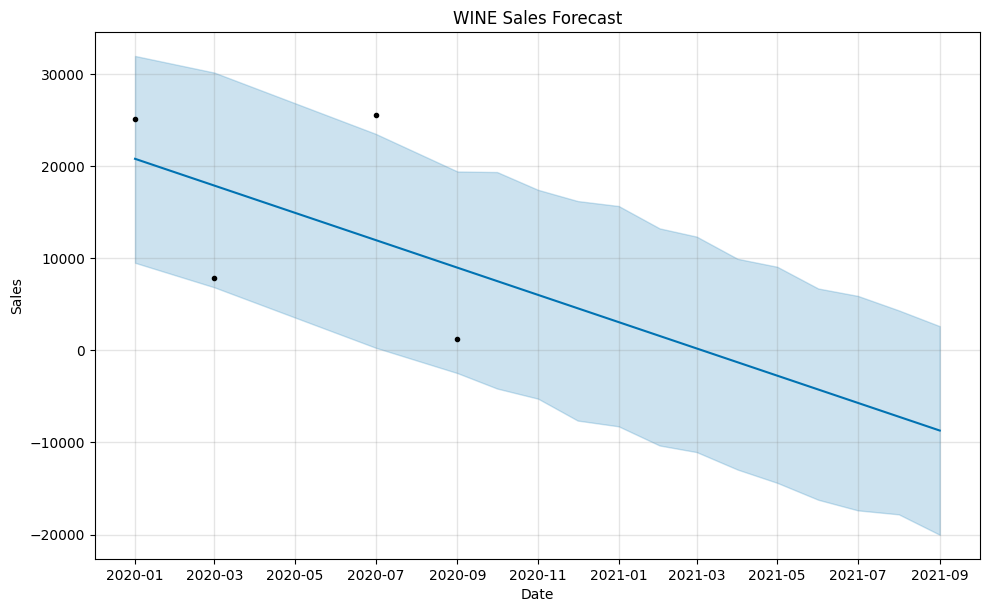

In [18]:

# Create future dataframe
future = model.make_future_dataframe(periods=12, freq='MS')  # 'MS' = month start
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('WINE Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
4,2020-10-01,7512.945389,-4153.242901,19346.357807
5,2020-11-01,6011.485270,-5254.401966,17416.383976
6,2020-12-01,4558.459348,-7632.765696,16199.435713
7,2021-01-01,3056.999228,-8257.529633,15658.710697
8,2021-02-01,1555.539109,-10337.787349,13230.403249
9,2021-03-01,199.381582,-11051.925818,12338.407214
10,2021-04-01,-1302.078537,-12951.872642,9928.383482
11,2021-05-01,-2755.104459,-14391.325690,9065.037350
12,2021-06-01,-4256.564579,-16225.159729,6706.209656
13,2021-07-01,-5709.590501,-17378.483475,5903.686452


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/3idn9at2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/tjw4lk02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63487', 'data', 'file=/tmp/tmpif6tvnt8/3idn9at2.json', 'init=/tmp/tmpif6tvnt8/tjw4lk02.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_model3poac2wo/prophet_model-20250913060851.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:51 - cmdstanpy - INFO - Chain [1] start processing
IN

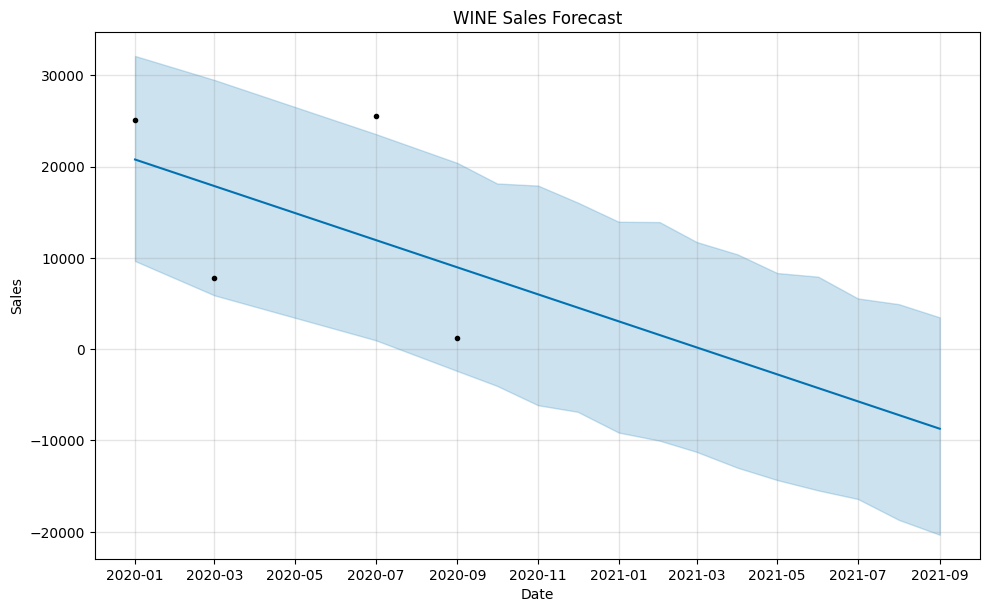

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/t6qsjids.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/ehrxknia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42169', 'data', 'file=/tmp/tmpif6tvnt8/t6qsjids.json', 'init=/tmp/tmpif6tvnt8/ehrxknia.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelfb9q0kqy/prophet_model-20250913060852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:52 - cmdstanpy - INFO - Chain [1] start processing
IN

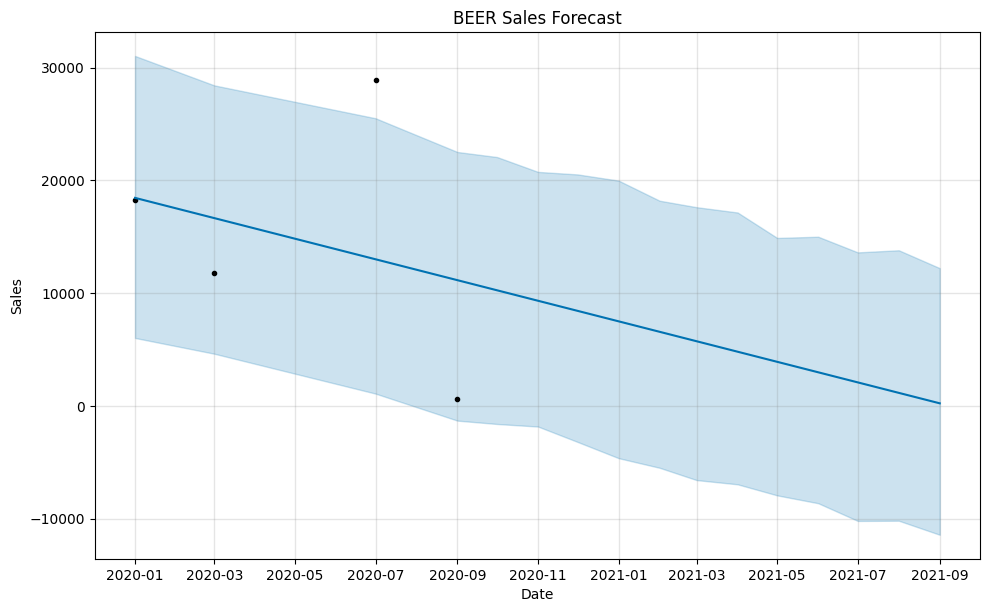

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/ge7ttxyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/m7r0frp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98183', 'data', 'file=/tmp/tmpif6tvnt8/ge7ttxyt.json', 'init=/tmp/tmpif6tvnt8/m7r0frp5.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelxrqj_6pa/prophet_model-20250913060852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:52 - cmdstanpy - INFO - Chain [1] start processing
IN

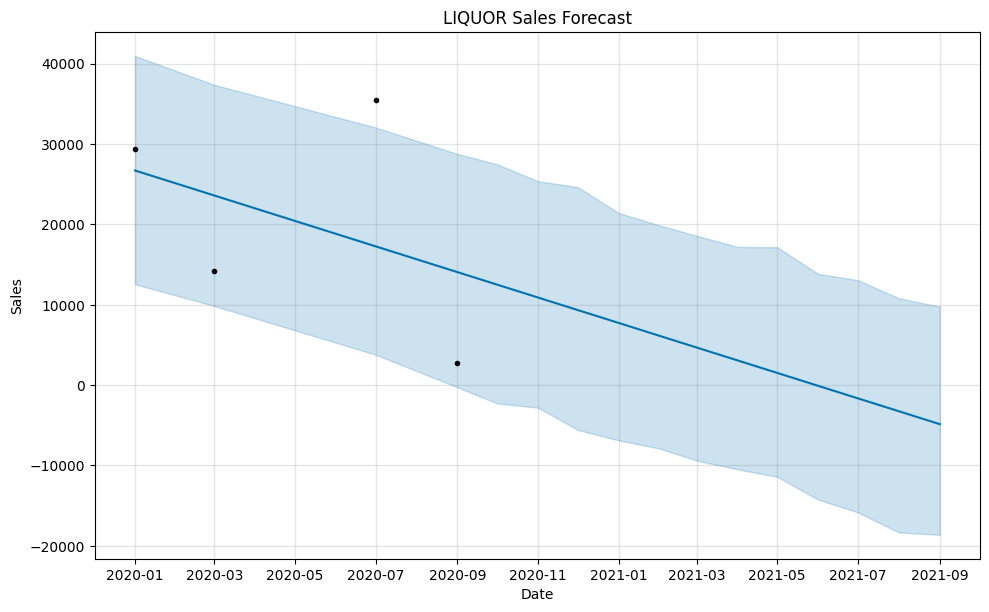

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/y7lu2xn0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/1_h9jppb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53216', 'data', 'file=/tmp/tmpif6tvnt8/y7lu2xn0.json', 'init=/tmp/tmpif6tvnt8/1_h9jppb.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelw1wa98n5/prophet_model-20250913060852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:52 - cmdstanpy - INFO - Chain [1] start processing
IN

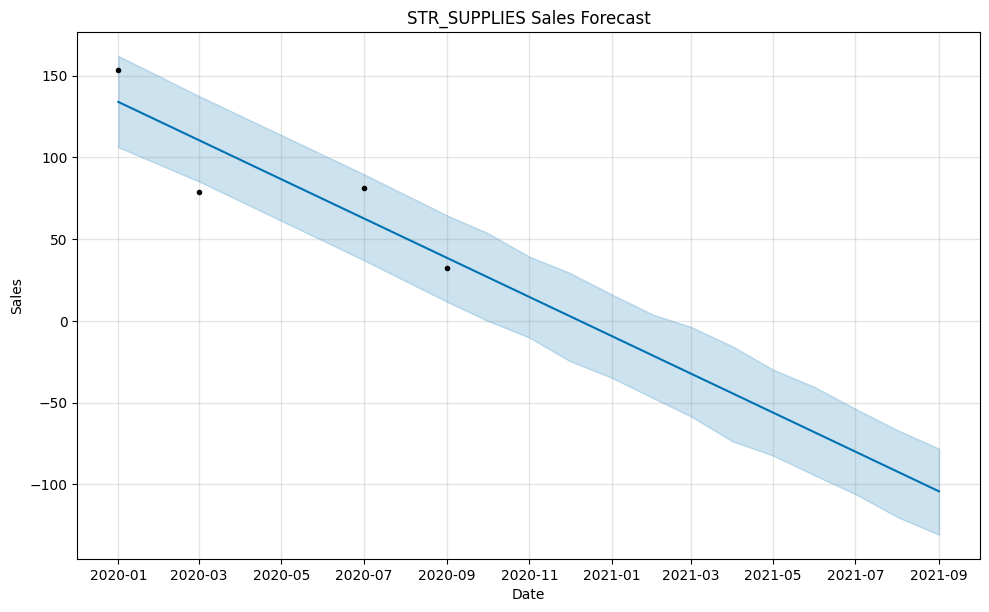

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


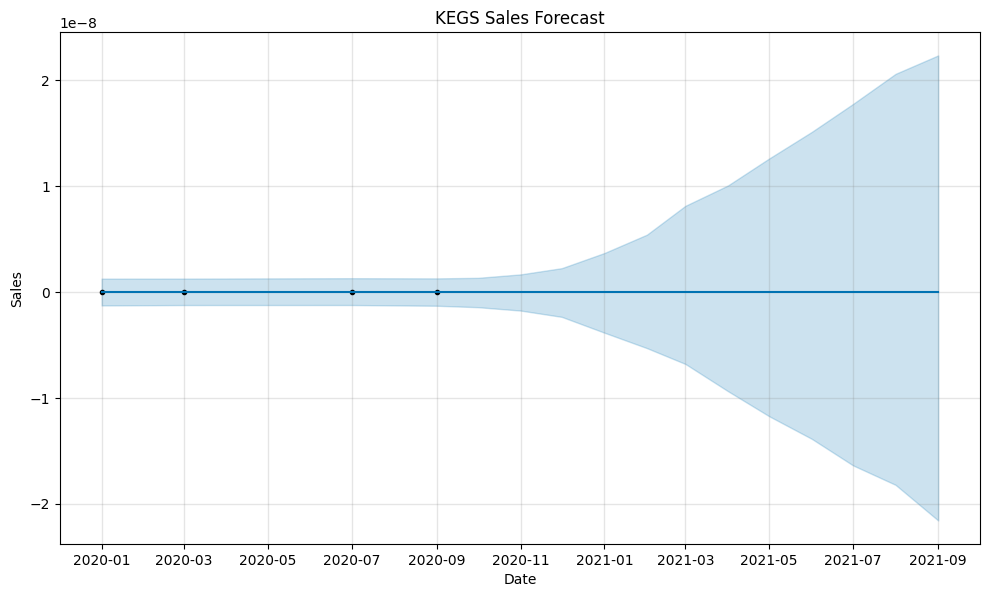

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/lf38w3do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/ci5af2wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36718', 'data', 'file=/tmp/tmpif6tvnt8/lf38w3do.json', 'init=/tmp/tmpif6tvnt8/ci5af2wp.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelrvu7d8s_/prophet_model-20250913060853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:53 - cmdstanpy - INFO - Chain [1] start processing
IN

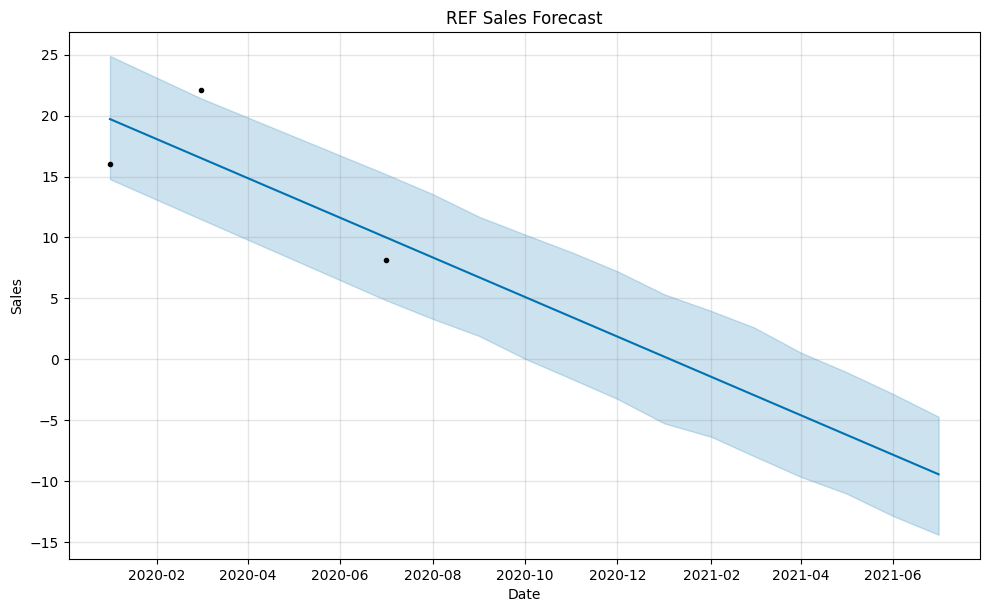

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


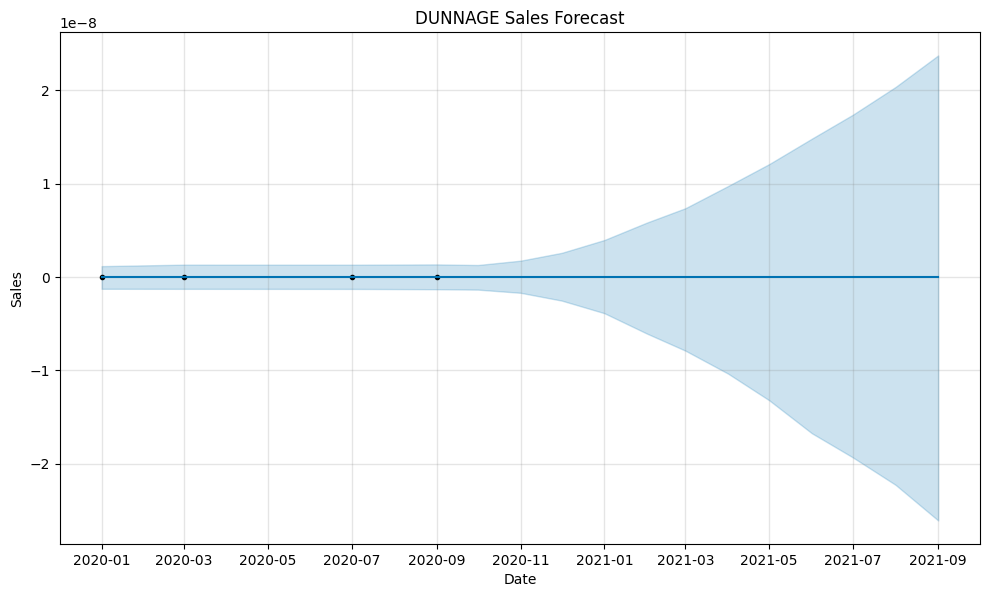

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/ednchkzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpif6tvnt8/pogftbm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24026', 'data', 'file=/tmp/tmpif6tvnt8/ednchkzx.json', 'init=/tmp/tmpif6tvnt8/pogftbm2.json', 'output', 'file=/tmp/tmpif6tvnt8/prophet_modelws8rk3wu/prophet_model-20250913060854.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:54 - cmdstanpy - INFO - Chain [1] start processing
IN

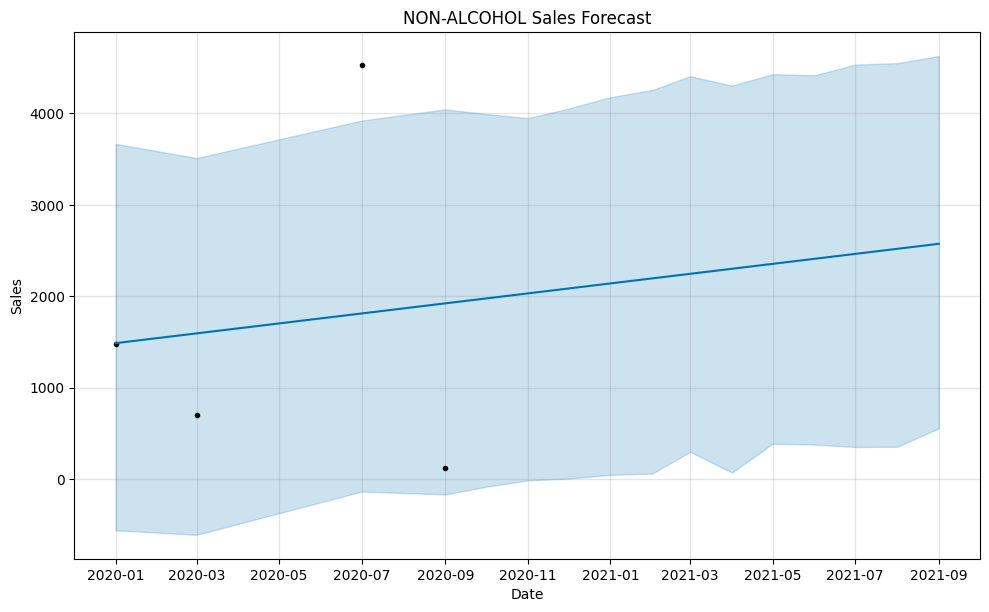

In [21]:
item_types = df['ITEM_TYPE'].unique()

for item in item_types:
    sub_df = df[df['ITEM_TYPE'] == item]
    sub_monthly = sub_df.groupby('DATE')['RETAIL_SALES'].sum().reset_index()
    sub_monthly = sub_monthly.rename(columns={'DATE': 'ds', 'RETAIL_SALES': 'y'})

    model = Prophet()
    model.fit(sub_monthly)

    future = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(future)

    model.plot(forecast)
    plt.title(f'{item} Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

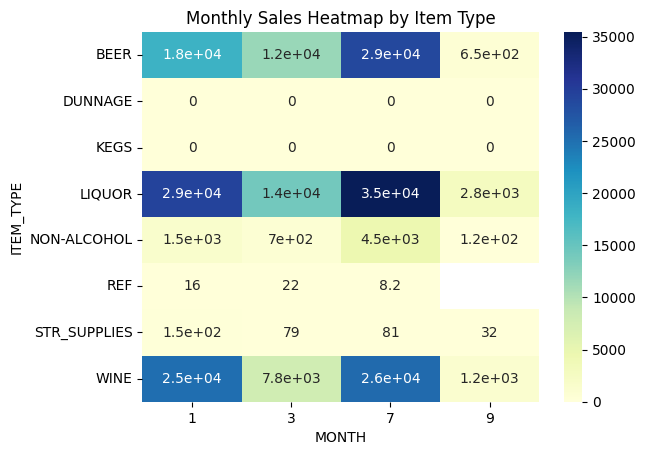

In [22]:
heatmap_df = df.groupby(['YEAR', 'MONTH', 'ITEM_TYPE'])['RETAIL_SALES'].sum().reset_index()
heatmap_pivot = heatmap_df.pivot_table(index='ITEM_TYPE', columns='MONTH', values='RETAIL_SALES', aggfunc='sum')

sns.heatmap(heatmap_pivot, cmap="YlGnBu", annot=True)
plt.title('Monthly Sales Heatmap by Item Type')
plt.show()
